# Project 3: Poisonous Mushrooms

In this project, you'll investigate properties of mushrooms. This classic dataset contains over 8000 examples, where each describes a mushroom by a variety of features like color, odor, etc., and the target variable is an indicator for whether the mushroom is poisonous. The feature space has been binarized. Look at the feature_names below to see all 126 binary names.

You'll start by running PCA to reduce the dimensionality from 126 down to 2 so that you can easily visualize the data. In general, PCA is very useful for visualization (though sklearn.manifold.tsne is known to produce better visualizations). Recall that PCA is a linear transformation. The 1st projected dimension is the linear combination of all 126 original features that captures as much of the variance in the data as possible. The 2nd projected dimension is the linear combination of all 126 original features that captures as much of the remaining variance as possible. The idea of dense low dimensional representations is crucial to machine learning!

Once you've projected the data to 2 dimensions, you'll experiment with clustering using k-means and density estimation with Gaussian mixture models (GMM). Finally, you'll train a classifier by fitting a GMM for the positive class and a GMM for the negative class, and perform inference by comparing the probabilities output by each model.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but please **prepare your own write-up and write your own code**.

In [1]:
%matplotlib inline

import urllib.request as urllib2 # For python3
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from matplotlib.colors import LogNorm

In [2]:
MUSHROOM_DATA = 'https://raw.githubusercontent.com/UCB-MIDS/207-Applied-Machine-Learning/master/Data/mushroom.data'
MUSHROOM_MAP = 'https://raw.githubusercontent.com/UCB-MIDS/207-Applied-Machine-Learning/master/Data/mushroom.map'

Load feature names.

In [3]:
feature_names = []

for line in urllib2.urlopen(MUSHROOM_MAP):
    [index, name, junk] = line.decode('utf-8').split()
    feature_names.append(name)

print('Loaded feature names: ', len(feature_names))
print(feature_names)

Loaded feature names:  126
['cap-shape=bell', 'cap-shape=conical', 'cap-shape=convex', 'cap-shape=flat', 'cap-shape=knobbed', 'cap-shape=sunken', 'cap-surface=fibrous', 'cap-surface=grooves', 'cap-surface=scaly', 'cap-surface=smooth', 'cap-color=brown', 'cap-color=buff', 'cap-color=cinnamon', 'cap-color=gray', 'cap-color=green', 'cap-color=pink', 'cap-color=purple', 'cap-color=red', 'cap-color=white', 'cap-color=yellow', 'bruises?=bruises', 'bruises?=no', 'odor=almond', 'odor=anise', 'odor=creosote', 'odor=fishy', 'odor=foul', 'odor=musty', 'odor=none', 'odor=pungent', 'odor=spicy', 'gill-attachment=attached', 'gill-attachment=descending', 'gill-attachment=free', 'gill-attachment=notched', 'gill-spacing=close', 'gill-spacing=crowded', 'gill-spacing=distant', 'gill-size=broad', 'gill-size=narrow', 'gill-color=black', 'gill-color=brown', 'gill-color=buff', 'gill-color=chocolate', 'gill-color=gray', 'gill-color=green', 'gill-color=orange', 'gill-color=pink', 'gill-color=purple', 'gill-col

Load data. The dataset is sparse, but there aren't too many features, so we'll use a dense representation, which is supported by all sklearn objects.

In [4]:
X, Y = [], []

for line in urllib2.urlopen(MUSHROOM_DATA):
    items = line.decode('utf-8').split()
    Y.append(int(items.pop(0)))
    x = np.zeros(len(feature_names))
    for item in items:
        feature = int(str(item).split(':')[0])
        x[feature] = 1
    X.append(x)

# Convert these lists to numpy arrays.
X = np.array(X)
Y = np.array(Y)

# Split into train and test data.
train_data, train_labels = X[:7000], Y[:7000]
test_data, test_labels = X[7000:], Y[7000:]

# Check that the shapes look right.
print(train_data.shape, test_data.shape)

(7000, 126) (1124, 126)


### Part 1:

Do a principal components analysis on the data. Show what fraction of the total variance in the training data is explained by the first k principal components, for k in [1, 2, 3, 4, 5, 10, 20, 30, 40, 50].  Also show a lineplot of fraction of total variance vs. number of principal components, for all possible numbers of principal components.

Notes:
* You can use `PCA` to produce a PCA analysis.

In [5]:
def P1():
    """ P1 - Performs a principal component analysis on the data. Then, shows the fraction of the total variance in 
                the training data explained by the first k components for each k. Then, shows a lineplot for the 
                variance ratio vs. the number of components (k).
    # param: None
    # return: None
    """
    
    #initialize variables
    my_k = [1, 2, 3, 4, 5, 10, 20, 30, 40, 50]
    my_variance = []
    my_fraction = []

    #iterate for each value of k
    for i in my_k:
        
        #sets PCA to the number of components and fits the training data
        pca = PCA(n_components=i)
        pca.fit(train_data)

        #get the fraction of the total variance explained by the first k components
        my_var = pca.explained_variance_ratio_
        my_var_sum = np.sum(my_var)
        
        #append values accordingly
        my_variance.append(my_var_sum)
        my_fraction.append([{'k':i},{'var':my_var_sum}])
        
    #show what fraction of the total variance in the training data is explained
    print('Fraction of the total variance in the training data explained by the first k principal components: \n')
    for j in range(0,len(my_fraction)):
        print(my_fraction[j])
    
    #show a lineplot of fraction of total variance vs. number of principal components
        #for each k in [1, 2, 3, 4, 5, 10, 20, 30, 40, 50]
    print('\nLineplot for each k: \n')
    plt.plot(my_k, my_variance)
    plt.xlabel('# of Principal Components (k)')
    plt.ylabel('Fraction of Total Variance')
    plt.show()
    
    #show a lineplot of fraction of total variance vs. number of principal components
        #for all possible numbers of principal components
    print('\nLineplot for all possible numbers of principal components: \n')
    pca = PCA().fit(train_data)
    plt.plot(np.cumsum(pca.explained_variance_ratio_))
    plt.xlabel('# of Principal Components (k)')
    plt.ylabel('Fraction of Total Variance')
    plt.show()


Fraction of the total variance in the training data explained by the first k principal components: 

[{'k': 1}, {'var': 0.1640433127933412}]
[{'k': 2}, {'var': 0.29727810148780287}]
[{'k': 3}, {'var': 0.3990126667087783}]
[{'k': 4}, {'var': 0.469646231045293}]
[{'k': 5}, {'var': 0.5083126932384268}]
[{'k': 10}, {'var': 0.6522141972565466}]
[{'k': 20}, {'var': 0.8089172630787939}]
[{'k': 30}, {'var': 0.8984837769223575}]
[{'k': 40}, {'var': 0.9509245139457898}]
[{'k': 50}, {'var': 0.9821028082178305}]

Lineplot for each k: 



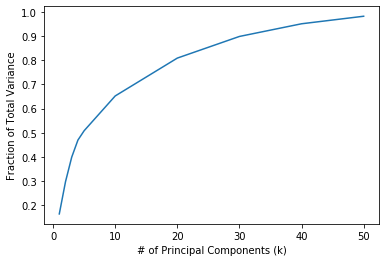


Lineplot for all possible numbers of principal components: 



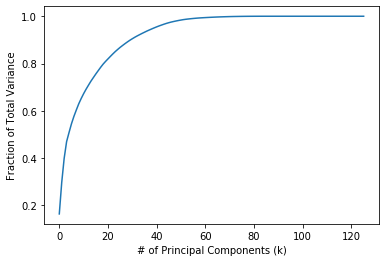

In [6]:
P1()

### Part 2:

PCA can be very useful for visualizing data. Project the training data down to 2 dimensions and show as a square scatterplot. Show the positive (poisonous) examples in red and the negative (non-poisonous) examples in green. Here's a reference for plotting: http://matplotlib.org/users/pyplot_tutorial.html

Notes:
* You can use `PCA` to produce a PCA analysis.

In [7]:
def P2():
    """ P2 - Performs PCA and projects the training data down to 2 dimensions. Then shows the data as a square
                scatterplot. The positive (poisonous) examples are shown in red and the negative (non-poisonous) 
                examples are in green.
    # param: None
    # return: None
    """
    
    #project the training data down to 2 dimensions
    pca = PCA(n_components=2)
    
    #fit and transform the training data
    pca.fit(train_data)
    X_pca = pca.transform(train_data) 

    #negatives => labels == 0
    #positives => labels == 1
    
    #set the axis to each of the 2 pca dimensions
    Xax = X_pca[:,0]
    Yax = X_pca[:,1]

    #set the point labels to the training labels
    labels = train_labels

    #show positive/poisonous examples in red & negative/non-poisonous in green
    cdict = {0:'green',1:'red'}
    labl = {0:'Negative - Non-Poisonous',1:'Positive - Poisonous'}
    marker = {0:'*',1:'o'}
    alpha = {0:.3, 1:.5}

    #initialize the plot figure
    fig,ax = plt.subplots(figsize=(10,8))
    fig.patch.set_facecolor('white')

    #iterate for each label
    for l in np.unique(labels):
        #get the data for each label and plot accordingly
        ix=np.where(labels==l)
        ax.scatter(Xax[ix],Yax[ix],c=cdict[l],s=40,
            label=labl[l],marker=marker[l],alpha=alpha[l])

    #produce the square scatterplot
    plt.xlabel("First Principal Component",fontsize=14)
    plt.ylabel("Second Principal Component",fontsize=14)
    plt.title("Poisonous Mushrooms",fontsize=18)
    plt.legend()
    plt.show()
    

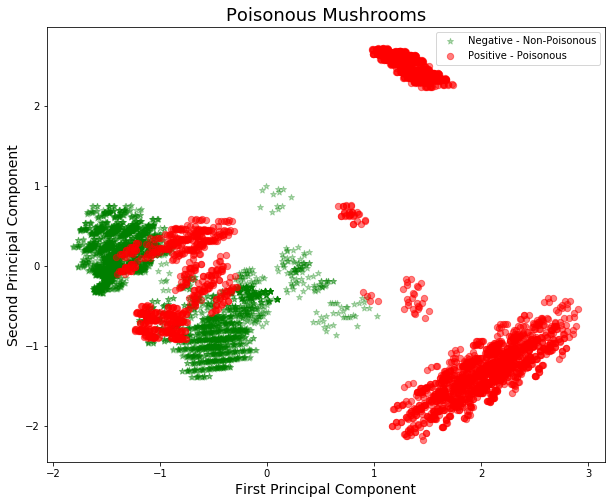

In [8]:
P2()

### Part 3:

Fit a k-means cluster model with 6 clusters over the 2d projected data. As in part 2, show as a square scatterplot with the positive (poisonous) examples in red and the negative (non-poisonous) examples in green.  For each cluster, mark the centroid and plot a circle that goes through the cluster's example that is most distant from the centroid.

Notes:
* You can use `KMeans` to produce a k-means cluster analysis.
* You can use `linalg.norm` to determine distance (dissimilarity) between observations.

In [9]:
def erin_furthest_distance(kmeans_pca, X_pca):
    """ erin_furthest_distance - Calculates the distance of each point to its cluster center, using linalg.norm. 
            Then, returns lists with the coordinates and distance of the points with the greatest distance from 
            each cluster center.
    # param: kmeans_pca - The kmeans model with 6 clusters that is fit over the 2d PCA projected data.
    # param: X_pca - The training data that has been projected to 2 dimensions using PCA. 
    # return: max_points_x - A list of the x coordinates for the points with the greatest distance from each
                cluster center.
    # return: max_points_y - A list of the y coordinates for the points with the greatest distance from each
                cluster center.
    # return: norm_distance - A list of the distances for the points with the greatest distance from each 
                cluster center.
    """

    #initialize variables
    max_points_x = []
    max_points_y = []
    norm_distance = []

    #iterate through each cluster
    for i in range(0,kmeans_pca.n_clusters):
        #get cluster center and initialize temp variables
        my_center = kmeans_pca.cluster_centers_[i]
        my_norm_max = 0
        my_max_point = 0

        #iterate through all the data points
        for j in range(0,len(X_pca)):
            
            #if that data point belongs to the given cluster
            if kmeans_pca.labels_[j] == i:
                
                #calculate the distance from the point to the center
                my_norm = np.linalg.norm(my_center - X_pca[j])

                #update max values accordingly
                if my_norm > my_norm_max:
                    my_norm_max = my_norm
                    my_max_point = X_pca[j]

        #append values to output lists
        max_points_x.append(my_max_point[0])
        max_points_y.append(my_max_point[1])
        norm_distance.append(my_norm_max)

    #return output lists
    return(max_points_x, max_points_y, norm_distance)

In [10]:
def P3():
    """ P3 - Performs PCA and projects the training data down to 2 dimensions and fits a k-means cluster model 
                with 6 clusters over the 2d projected data. Then shows the data as a square scatterplot. 
                The positive (poisonous) examples are shown in red and the negative (non-poisonous) examples are in 
                green. The cluster centroids are marked and circles are drawn around them through the cluster's 
                point that is most distant from the centroid.
    # param: None
    # return: None
    """
    
    #project the training data down to 2 dimensions
    pca = PCA(n_components=2)

    #fit and transform the training data
    pca.fit(train_data)
    X_pca = pca.transform(train_data) 

    #fit a k-means cluster model with 6 clusters over the 2d projected data
    kmeans_pca = KMeans(n_clusters=6, n_init=50, max_iter=500)
    kmeans_pca.fit(X_pca)
    
    #negatives => labels == 0
    #positives => labels == 1

    #set the axis to each of the 2 pca dimensions
    Xax = X_pca[:,0]
    Yax = X_pca[:,1]

    #set the point labels to the training labels
    labels = train_labels

    #show positive/poisonous examples in red & negative/non-poisonous in green
    cdict = {0:'green',1:'red'}
    labl = {0:'Negative - Non-Poisonous',1:'Positive - Poisonous'}
    marker = {0:'*',1:'o'}
    alpha = {0:.3, 1:.5}

    #initialize the plot figure
    fig,ax = plt.subplots(figsize=(10,8))
    fig.patch.set_facecolor('white')

    #iterate for each label
    for l in np.unique(labels):
        #get the data for each label and plot accordingly
        ix=np.where(labels==l)
        ax.scatter(Xax[ix],Yax[ix],c=cdict[l],s=40,
            label=labl[l],marker=marker[l],alpha=alpha[l])

    #for each cluster, mark the centroid    
    plt.scatter(kmeans_pca.cluster_centers_[:,0] ,kmeans_pca.cluster_centers_[:,1], color='black',
               label='Centroid', marker='v')

    #for each cluster, mark the point that is most distant from the centroid.
    max_points_x, max_points_y, norm_distance = erin_furthest_distance(kmeans_pca, X_pca)
    plt.scatter(max_points_x ,max_points_y, color='blue',
               label='Most Distant Point from Centroid', marker='x')

    #draw circles around each cluster center 
        #that go through the point that is the greatest distance from the center
    for i in range(0,kmeans_pca.n_clusters):
        #get cluster center and distance
        my_center = kmeans_pca.cluster_centers_[i]
        my_dist = norm_distance[i]
    
        #plot circle
        circle = plt.Circle((my_center[0], my_center[1]), my_dist, fill=False)
        ax.add_artist(circle)
     
    #produce the square scatterplot
    plt.xlabel("First Principal Component",fontsize=14)
    plt.ylabel("Second Principal Component",fontsize=14)
    plt.title("Poisonous Mushrooms",fontsize=18)
    plt.legend()
    plt.show()


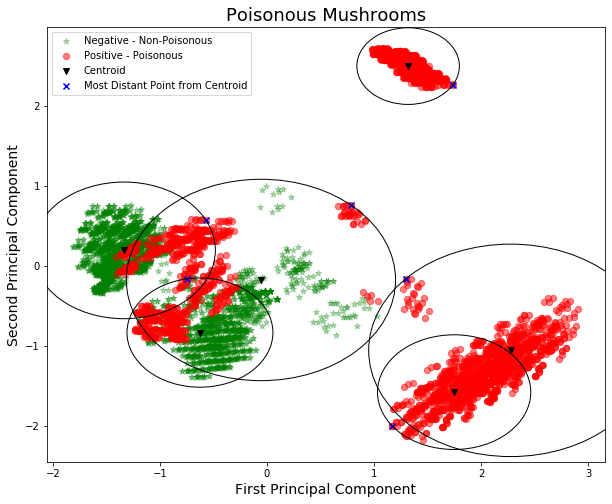

In [11]:
P3()

### Part 4:

Fit Gaussian mixture models for the positive (poisonous) examples in your 2d projected data. Vary the number of mixture components from 1 to 4 and the covariance matrix type 'spherical', 'diag', 'tied', 'full' (that's 16 models).  Show square plots of the estimated density contours presented in a 4x4 grid - one row each for a number of mixture components and one column each for a convariance matrix type.  

Notes:
* You can use `GaussianMixture(n_components=..., covariance_type=..., random_state=12345)` to produce a Gaussian mixture model.
* You can use `contour` in combination with other methods to plot contours, like in this example: http://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_pdf.html#example-mixture-plot-gmm-pdf-py
* You can use `contour` without the `norm` and `levels` parameters. 

In [12]:
def P4():
    """ P4 - Performs PCA and projects the training data down to 2 dimensions. Then, fits a Gaussian mixture model
                for the positive/poisonous examples. This is done for 1-4 mixture components as well and four 
                different covariance matrix types. These results then produce a 4x4 grid of plots of the estimated
                density contours where each row represents the number of mixture components and each column
                represents the covarince matrix type.
    # param: None
    # return: None
    """
    
    #project the training data down to 2 dimensions
    pca = PCA(n_components=2)

    #fit and transform the training data
    pca.fit(train_data)
    X_pca = pca.transform(train_data)
    
    #subset to just positive/poisonous examples in 2d projected data
    pos_ex = []
    for i in range(0,len(X_pca)):
        if train_labels[i] == 1:
            pos_ex.append([X_pca[i][0], X_pca[i][1]])
     
    #convert to nd array
    pos_ex = np.array(pos_ex)
    
    #initialize variables
    cov_m_types = ['spherical','diag','tied','full']
    loc = 1
    fig,ax = plt.subplots(figsize=(12,10))

    #one row each for a number of mixture components
    for i in range(0,4):

        #one column each for a convariance matrix type
        for j in cov_m_types:

            #create an instance of the GaussianMixture class
            gmm = GaussianMixture(n_components=(i+1), covariance_type=j, random_state=12345)

            #fit the gmm model
            gmm.fit(pos_ex)

            #initialize the plot figure
            plt.subplot(4,4,loc)
            loc += 1

            # display predicted scores by the model as a contour plot
            x = np.linspace(-3., 3.)
            y = np.linspace(-3., 3.)
            X, Y = np.meshgrid(x, y)
            XX = np.array([X.ravel(), Y.ravel()]).T
            Z = -gmm.score_samples(XX)
            Z = Z.reshape(X.shape)

            #plot the contours
            CS = plt.contour(X, Y, Z)
            CB = plt.colorbar(CS, shrink=0.8, extend='both')

            #plot the data points with the contours
            plt.scatter(pos_ex[:,0], pos_ex[:,1], 0.8)

            #set the axis ticks
            plt.xticks([])
            plt.yticks([])

            #set the column labels
            if i == 0:
                plt.title(j, fontsize=14)

            #set the row labels
            if j == 'spherical':
                my_label = str(i+1) + ' GMM'
                plt.ylabel(my_label, fontsize=14)


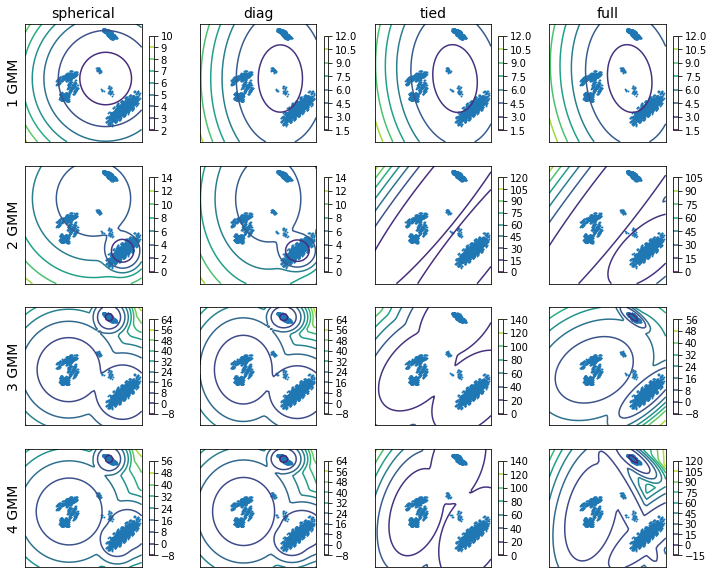

In [13]:
P4()

### Part 5:

Fit two Gaussian mixture models, one for the positive examples and one for the negative examples in your 2d projected data. Use 4 mixture components and full convariance for each model.  Predict the test example labels by picking the labels corresponding to the larger of the two models' probabilities.  What is the accuracy of you predictions on the test data?

Notes:
* You can use `GaussianMixture(n_components=..., covariance_type=..., random_state=12345)` to produce a Gaussian mixture model.
* You can use `GaussianMixture`'s `score_samples` method to find the probabilities.

In [14]:
def P5():
    """ P5 - Performs PCA and projects the training data down to 2 dimensions. Then, fits a Gaussian mixture model
                for the positive/poisonous examples and a separate one for the negative/non-poisonous examples.
                The predicted labels are determined from the larger of the two models' probabilities and the 
                accuracy is then determined.
    # param: None
    # return: None
    """
    
    #project the training data down to 2 dimensions
    pca = PCA(n_components=2)

    #fit and transform the training and test data
    pca.fit(train_data)
    X_pca = pca.transform(train_data)
    Xtest_pca = pca.fit_transform(test_data)

    #initialize variables
    pos_ex = []
    neg_ex = []

    #separate positive/poisonous and negative/non-poisonous examples in 2d projected data
    for i in range(0,len(X_pca)):
        if train_labels[i] == 1:
            pos_ex.append([X_pca[i][0], X_pca[i][1]])
        else:
            neg_ex.append([X_pca[i][0], X_pca[i][1]])

    #convert to nd array
    pos_ex = np.array(pos_ex)
    neg_ex = np.array(neg_ex)
    
    #create pos/neg instances of the GaussianMixture class
    gmm_pos = GaussianMixture(n_components=4, covariance_type='full', random_state=12345)
    gmm_neg = GaussianMixture(n_components=4, covariance_type='full', random_state=12345)

    #fit the gmm models
    gmm_pos.fit(pos_ex)
    gmm_neg.fit(neg_ex)
    
    #get the probabilities for each of the two models
    pos_prob = gmm_pos.score_samples(Xtest_pca)
    neg_prob = gmm_neg.score_samples(Xtest_pca)
    
    #initialize prediction list
    my_pred_y = []

    #iterate through each test data point
    for i in range(0,len(Xtest_pca)):
        #get the positive and negative predicted probability
        pos_p = pos_prob[i]
        neg_p = neg_prob[i]

        #set the predicted value to the larger probability
        if pos_p > neg_p:
            my_val = 1
        else:
            my_val = 0

        #append the value to the prediction list
        my_pred_y.append(my_val)
    
    #initialize accuracy count
    my_acc = 0

    #iterate through each test label
    for j in range(0,len(test_labels)):
        #get the predicted and actual labels
        pred = my_pred_y[j]
        actual = test_labels[j]

        #increment the accuracy count if the predicted value matches the actual value
        if pred == actual:
            my_acc += 1
        
    #print the accuracy score
    print('Accuracy on the Test Data: ', my_acc/len(test_labels))
    

In [15]:
P5()

Accuracy on the Test Data:  0.5088967971530249


### Part 6:

Run a series of experiments to find the Gaussian mixture model that results in the best accuracy with no more than 50 parameters.  Do this by varying the number of PCA components, the number of GMM components, and the covariance type.

Notes:
* You can use `GaussianMixture(n_components=..., covariance_type=..., random_state=12345)` to produce a Gaussian mixture model.


* For spherical, diag, and full covariance types:
  * number of parameters = (number of parameters per gmm component * number of gmm components - 1) * number of classes
  * number of parameters per gmm component includes all the means plus all the non-zero, non-duplicated values in the covariance matrix plus the mixing weight
  * Each mixing weight parameter indicates how much to weight a particular gmm component; the -1 above accounts for the fact that the mixing weights must sum to 1, so you do not need to include the last mixing weight as its own parameter


* To calculate the number of parameters for tied covariance type:
  * number of parameters = (number of parameters per class - 1) * number of classes
  * number of parameters per class includes all the means and mixing weights for all the gmm components plus all the non-zero, non-duplicated values in the one shared covariance matrix
  * Each mixing weight parameter indicates how much to weight a particular gmm component; the -1 above accounts for the fact that the mixing weights must sum to 1, so you do not need to include the last mixing weight as its own parameter

In [16]:
def P6():
    """ P6 - Performs a series of experiments with PCA and Gaussian Mixture Models that result in the best accuracy
                with no more than 50 parameters. This is accomplised by varying the number of PCA components, the
                number of GMM components, as well as the covariance type.
    # param: None
    # return: None
    """

    #initialize parameters
    my_best_acc = 0
    best_pca_dim = 0
    best_gmm_comp = 0
    best_cov_type = ''
    best_num_param = 0

    #iterate through different amounts of PCA components
    for pca_dim in [1,2,3,4,5]:

        #project the training data down to i dimensions
        pca = PCA(n_components=pca_dim)

        #fit and transform the training and test data
        pca.fit(train_data)
        X_pca = pca.transform(train_data)
        Xtest_pca = pca.fit_transform(test_data)

        #iterate through different amounts of GMM components
        for gmm_comp in [1,2,3,4]:

            #iterate through different amounts of covariance types
            for cov_type in ['spherical', 'diag', 'full', 'tied']:

                #create instances of the GaussianMixture class with specificed parameters
                gmm = GaussianMixture(n_components=gmm_comp, covariance_type=cov_type, random_state=12345)

                #fit the gmm models
                gmm.fit(X_pca) 

                #special formular for the 'tied' covariance type
                if cov_type == 'tied':

                    #number of parameters per class includes all the:

                    #means - 
                        #shape = (n_components, n_features)
                    my_gmm_means = gmm.means_
                    gmm_mean = gmm_comp * pca_dim

                    #and the mixing weights for all the gmm components
                        #shape = (n_components, )
                    my_gmm_weights = gmm.weights_
                    gmm_weight = gmm_comp

                    #plus all the non-zero, non-duplicated values in the one shared covariance matrix
                        #shape = (n_features, n_features) 
                    my_gmm_cov = gmm.covariances_
                    my_gmm_cov = my_gmm_cov[np.nonzero(my_gmm_cov)]
                    my_gmm_cov = np.unique(my_gmm_cov)
                    gmm_cov = len(my_gmm_cov)

                    #combine those parameters together
                    num_p_c = gmm_mean + gmm_weight + gmm_cov

                    #calculate the number of parameters
                    #number of parameters = (number of parameters per class - 1) * number of classes
                    num_params = (num_p_c - 1) * pca_dim

                else:

                    #number of parameters per gmm component includes all the: 

                    #means - 
                        #shape = (n_features, )
                        #per gmm component!
                    my_gmm_means = gmm.means_
                    gmm_mean = pca_dim

                    #plus the mixing weight
                        #shape = (n_components,)
                        #per gmm component!
                    my_gmm_weights = gmm.weights_
                    gmm_weight = 1

                    #plus all the non-zero, non-duplicated values in the covariance matrix
                        #shape = (n_components,)
                        #per gmm component!
                    if cov_type == 'spherical':
                        my_gmm_cov = gmm.covariances_
                        gmm_cov = 1

                        #shape = (n_components, n_features)
                        #per gmm component!
                    elif cov_type == 'diag':
                        my_gmm_cov = gmm.covariances_
                        gmm_cov = pca_dim

                    #full case:
                        #shape = (n_components, n_features, n_features)
                        #per gmm component!
                    else:
                        my_gmm_cov = gmm.covariances_[0]
                        my_gmm_cov = my_gmm_cov[np.nonzero(my_gmm_cov)]
                        my_gmm_cov = np.unique(my_gmm_cov)
                        gmm_cov = len(my_gmm_cov)

                    #combine those parameters together
                    num_per_component = gmm_mean + gmm_cov + gmm_weight

                    #calculate the number of parameters
                    #number of parameters = (number of parameters per gmm component * 
                        #number of gmm components - 1) * number of classes
                    num_params = ((num_per_component * gmm_comp) - 1) * pca_dim

                #get the accuracy if the number of parameters does NOT exceed 50
                if num_params <= 50:
                    
                    #get the predicted labels
                    labels = gmm.predict(Xtest_pca)

                    #increment the count of accurate predictions accordingly
                    my_acc = 0
                    for i in range(0,len(test_labels)):
                        my_pred = labels[i]
                        my_actual = test_labels[i]

                        if my_pred == my_actual:
                            my_acc += 1

                    #compute the overall accuracy
                    the_accuracy = my_acc/len(test_labels)

                    #update variables accordingly
                    if the_accuracy > my_best_acc:
                        my_best_acc = the_accuracy 
                        best_pca_dim = pca_dim
                        best_gmm_comp = gmm_comp
                        best_cov_type = cov_type
                        best_num_param = num_params

    #print the results
    print('Best Accuracy with no more than 50 Parameters: ', my_best_acc, '\n')
    print('# PCA Dimensions: ', best_pca_dim, '\n')
    print('# GMM Components: ', best_gmm_comp, '\n')
    print('Covariance Matrix Type: ', best_cov_type, '\n')
    print('# Computed Parameters: ', best_num_param, '\n')


In [17]:
P6()

Best Accuracy with no more than 50 Parameters:  0.6307829181494662 

# PCA Dimensions:  3 

# GMM Components:  3 

Covariance Matrix Type:  spherical 

# Computed Parameters:  42 

